In [1]:
from torch.utils.data import TensorDataset

import Lightning.models.basic_lightning as basic_lightning
import torch
# help us when we start working with larger datasets;
from torch.utils.data import TensorDataset, DataLoader
import lightning as L

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_doses = torch.linspace(start=0, end=1, steps=11)

In [3]:
model = basic_lightning.BasicLightning()
output_values = model(input_doses)

Text(0.5, 0, 'Dose')

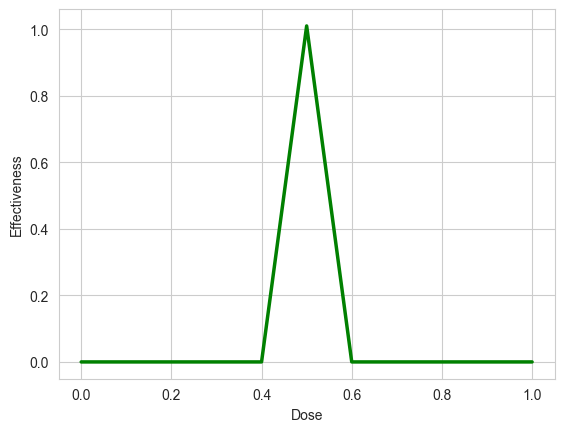

In [4]:
sns.set_style("whitegrid")
sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose")

Text(0.5, 0, 'Dose')

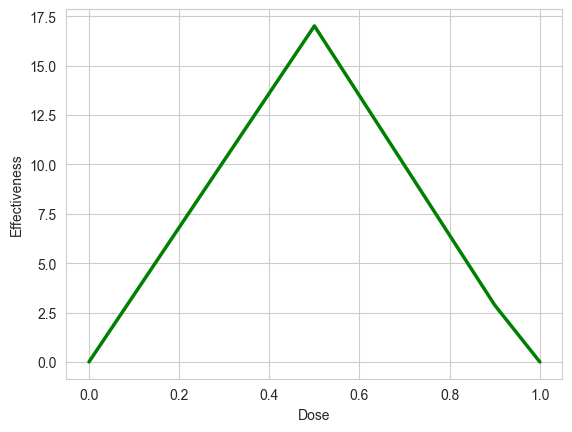

In [5]:
model_train = basic_lightning.BasicLightningTrain()
output_values = model_train(input_doses)

sns.set_style("whitegrid")
# We call detach() on the output values to create a new tensor that only has the values
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose")

DataLoaders are super useful when we have a lot of data because:
    - They make it easy to access the data in batchrs
    - They make it easy to shuffle the data each epoch
    - They make it easy to use a relatively small function of the data if we want to do a quick and dirty training for debugging

In [6]:
inputs = torch.tensor([0, 0.5, 1.])
labels = torch.tensor([0., 1., 0.])
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [7]:
trainer = L.Trainer(max_epochs=34)
tuner = L.pytorch.tuner.Tuner(trainer)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/chengjiaying/anaconda3/envs/BachelorProjekt/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [8]:
# Here we use this to find a good lr
lr_find_results = tuner.lr_find(model_train,
                                        train_dataloaders=dataloader,
                                        min_lr=0.001,
                                        max_lr=1.0,
                                        early_stop_threshold=None)
new_lr = lr_find_results.suggestion()
print(f"New learning rate: {new_lr}")

/Users/chengjiaying/anaconda3/envs/BachelorProjekt/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/chengjiaying/anaconda3/envs/BachelorProjekt/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002137962089502232
Restoring states from the checkpoint path at /Users/chengjiaying/BachelorProjekt/Lightning/notebooks/.lr_find_08389cb3-b4b2-4acc-abb5-3c09927cef57.ckpt
Restored all states from the checkpoint at /Users/chengjiaying/BachelorProjekt/Lightning/notebooks/.lr_find_08389cb3-b4b2-4acc-abb5-3c09927cef57.ckpt


New learning rate: 0.002137962089502232


In [9]:
model_train.learning_rate = new_lr

In [10]:
# Train the model
# To train the model and optimize b_final, we use the trainer to call the fit() function
# fit need the model and the dataloader
trainer.fit(model, train_dataloaders=dataloader)
print(model.final_bias.data)

MisconfigurationException: No `training_step()` method defined. Lightning `Trainer` expects as minimum a `training_step()`, `train_dataloader()` and `configure_optimizers()` to be defined.